# PIG and HIVE MovieLens Analysis
The following notebook will be used to analyse the MovieLens dataset that accompanies the first assignment for the CA4022 module. We will produce various visualization to explain the distribution of the data and relationships within it.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
#Read in data
movies_ratings = pd.read_csv('data/m_r_joined', sep='\t',
                             names=['movieid','title','year','genres','userid','rating','timestamp'])
#Drop any missing values
movies_ratings.dropna(inplace=True)

#Reset the index
movies_ratings.reset_index(inplace=True, drop=True)
movies_ratings.head()

,movieid,title,year,genres,userid,rating,timestamp
0,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",314,3.0,834398280
1,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",240,5.0,849122434
2,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",500,4.0,1005527755
3,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",90,3.0,856353996
4,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",89,3.0,1520408314


In [225]:
#Test for nulls
movies_ratings.isnull().any()

movieid      False
title        False
year         False
genres       False
userid       False
rating       False
timestamp    False
dtype: bool

In [226]:
#Count the number of ratings per movie
most_ratings=movies_ratings[['movieid', 'title', 'rating']].groupby(by=['movieid', 'title']).sum().sort_values(by='movieid', ascending=True)
count_rating=movies_ratings[['movieid', 'title', 'rating']].groupby(by=['movieid', 'title']).count().sort_values(by='movieid', ascending=True)

In [227]:
avg_rate = most_ratings.divide(count_rating, axis=0).rename({'rating':'average_rating'}, axis=1)

In [228]:
#Some manipulation
m_r_avg = movies_ratings.merge(right=avg_rate, on=['movieid', 'title'])

In [229]:
m_r=m_r_avg.merge(right=count_rating, on=['movieid', 'title']).drop('rating_x', axis=1).rename({'rating_y':'rating_count'}, axis=1)

In [230]:
m_r_a_c = m_r[['movieid','title' , 'average_rating', 'rating_count']].drop_duplicates()

In [231]:
#So Now we have a list of the top 100 rated movies with over 100 ratings
m_r_a_c=m_r_a_c[m_r_a_c['rating_count'] > 100].sort_values(by='average_rating', ascending=False).iloc[:101,:]

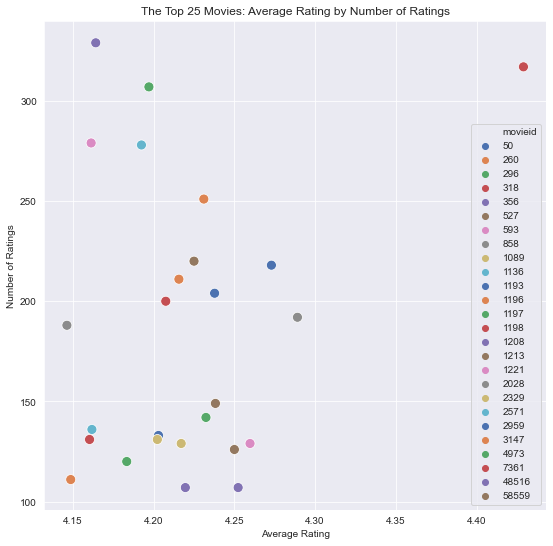

In [299]:
sns.set_style("darkgrid")
import seaborn as sns
plt.figure(figsize=(9,9))

sns.scatterplot(data= m_r_a_c.iloc[:26,:], x='average_rating', y='rating_count', hue='movieid', palette='deep', s=100)
plt.title('The Top 25 Movies: Average Rating by Number of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.savefig("avgrating.png")
plt.show()

In [248]:
most_ratings = m_r_a_c.sort_values(by='rating_count', ascending=False)
most_ratings.head()

,movieid,title,average_rating,rating_count
10019,356,Forrest Gump,4.164134,329
8652,318,The Shawshank Redemption,4.429022,317
7860,296,Pulp Fiction,4.197068,307
16228,593,The Silence of the Lambs,4.161290,279
45014,2571,The Matrix,4.192446,278


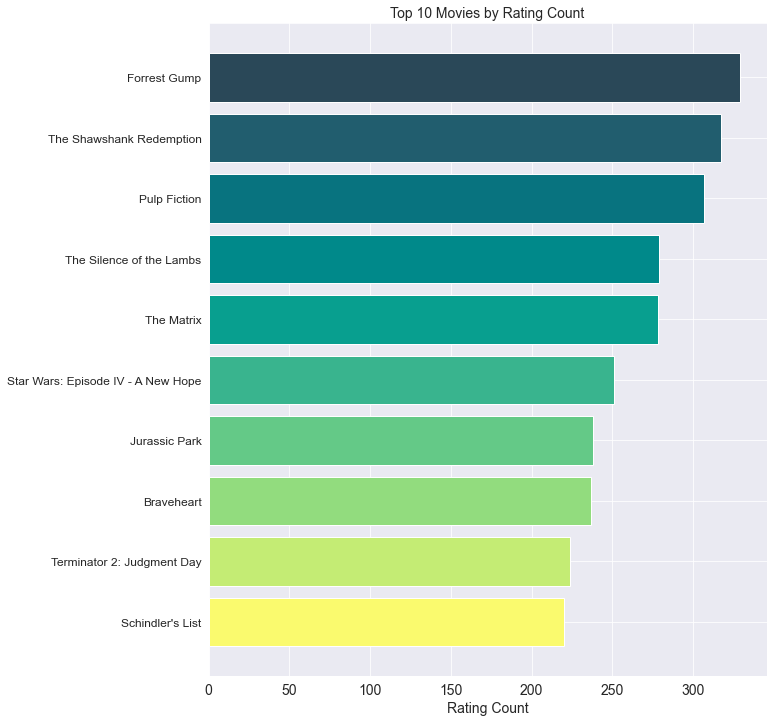

In [379]:
plt.figure(figsize=(10,12))

colors = ['#fafa6e','#c4ec74','#92dc7e','#64c987','#39b48e','#089f8f','#00898a','#08737f','#215d6e','#2a4858']

plt.barh(most_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).title, most_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).rating_count,
        color=colors)

plt.title("Top 10 Movies by Rating Count", fontsize=14)
plt.xlabel("Rating Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.savefig("topmovies.png")
plt.show()

In [380]:
least_ratings = m_r_a_c[m_r_a_c['rating_count'] > 25]
least_ratings.sort_values(by='average_rating', ascending=1, inplace=True)
least_ratings.head()

,movieid,title,average_rating,rating_count
4802,165,Die Hard: With a Vengeance,3.555556,144
68569,5816,Harry Potter and the Chamber of Secrets,3.598039,102
9721,349,Clear and Present Danger,3.604545,110
4602,161,Crimson Tide,3.635922,103
67135,5445,Minority Report,3.637500,120


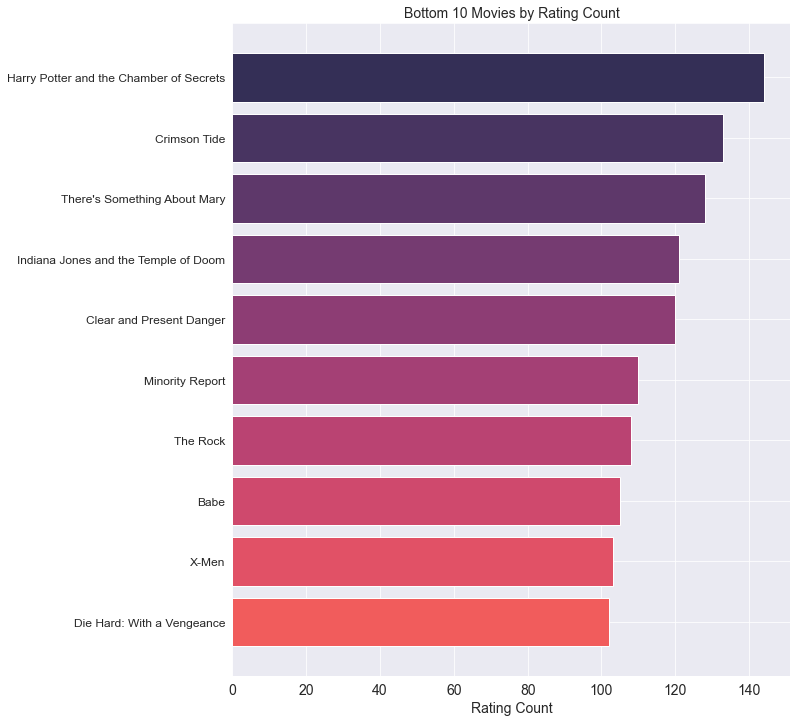

In [382]:
plt.figure(figsize=(10,12))

colors = ['#f15c5c','#e15166','#cf496d','#ba4372','#a44075','#8d3d74','#753b71','#5e386a','#483461','#342f56']

plt.barh(least_ratings.iloc[:10].sort_values(by='rating_count', ascending=0).title, least_ratings.iloc[:10].sort_values(by='rating_count', ascending=1).rating_count,
        color=colors)

plt.title("Bottom 10 Movies by Rating Count", fontsize=14)
plt.xlabel("Rating Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.savefig("bottommovies.png")
plt.show()

## We're now going to do some tag analysis
1. Most common words used to describe a movie

In [279]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seanc\anaconda3\python.exe -m pip install --upgrade pip' command.


C:\Users\seanc\AppData\Local\Temp/ipykernel_16580/1039982736.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['movieid']=tags['movieid'].astype('int')


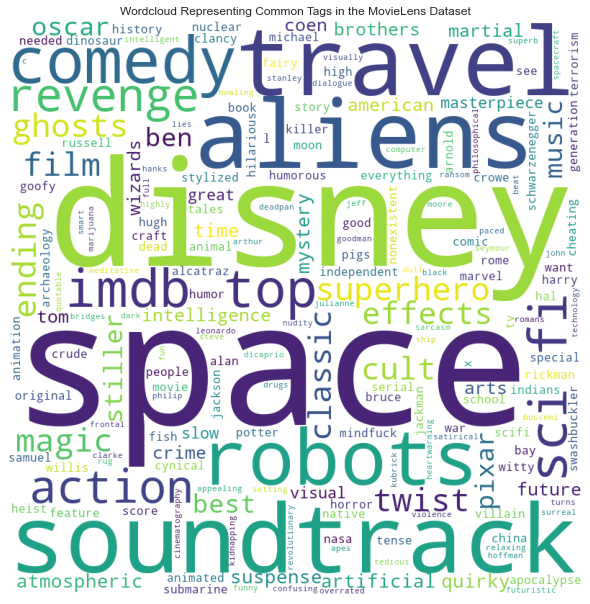

In [364]:
#Let's make a wordcloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

# Reads 'tags' file
tags = pd.read_csv("data/tags.csv", names=['userid', 'movieid', 'tag', 'timestamp'])
tags = df.iloc[1: , :]
tags['movieid']=tags['movieid'].astype('int')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags in the MovieLens Dataset")
plt.savefig("all_wordcloud.png")
plt.show()


In [338]:
#Top rated movies w/ tags
most_ratings.head()

#Get the id's of top 10 movies then filter tags by them
top_10_id = np.array(most_ratings.head(20).movieid)

top_10_tags = tags[tags['movieid'].isin(top_10_id)]
top_10_tags.shape

(354, 4)

In [362]:
#Bottom rated movies w/tags

#Filter our movies by ratings > 25
least_ratings = m_r_a_c[m_r_a_c['rating_count'] > 25]
least_ratings.sort_values(by='average_rating', ascending=1, inplace=True)

bottom_10_id = np.array(least_ratings.head(50).movieid)

bottom_10_tags = tags[tags['movieid'].isin(bottom_10_id)]
bottom_10_tags.shape

(197, 4)

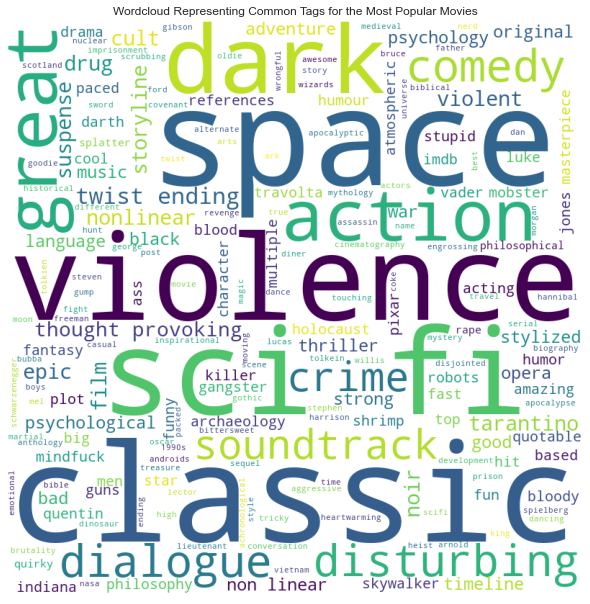

In [365]:
#Let's make a wordcloud

# Reads 'tags' file
df = top_10_tags
df = df.iloc[1: , :]

#Let's make a wordcloud for top and bottom rated movies
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags for the Most Popular Movies")
plt.savefig("good_wordcloud.png")
plt.show()

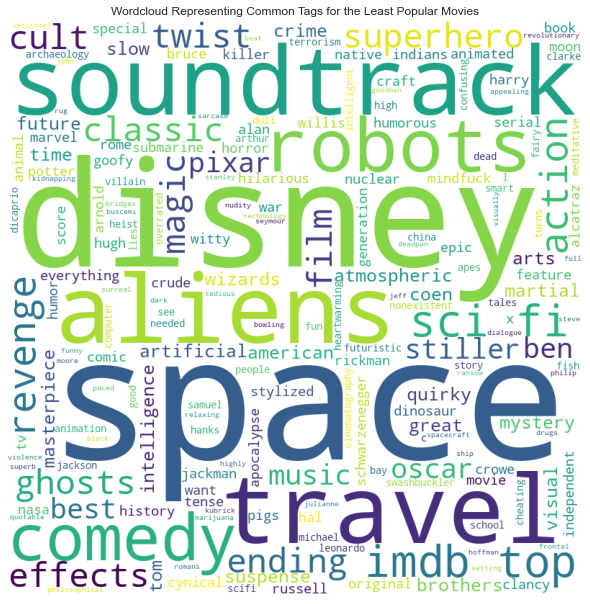

In [366]:
#Let's make a wordcloud

# Reads 'tags' file
df = bottom_10_tags
df = df.iloc[1: , :]

#Let's make a wordcloud for top and bottom rated movies
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.tag:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud Representing Common Tags for the Least Popular Movies")
plt.savefig("bad_wordcloud.png")
plt.show()